In [1]:
import simulation_settings as ss
import ship as ship
import constants
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
gg = constants.gg
rho = constants.rho
beta = constants.beta
# dt = constants.dt

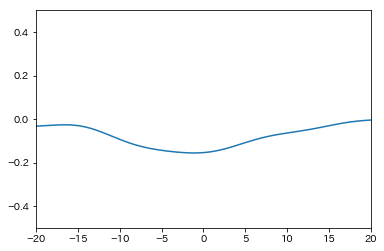

In [16]:
ww = ss.JONSWAP(100,10,0.5)
xdata = np.arange(-20,20,0.01)
ydata = np.array([ww.get(x,t) for x in xdata])
fig, ax = plt.subplots()
ax.set_xlim(-20.0,20.0)
ax.set_ylim(-0.5,0.5)
# ax.set_aspect('equal', adjustable='box')

ax.plot(xdata,ydata)


In [17]:
dt = 0.01
t=0


wave_heights = []
wave_interval = []

tmp_max=0
tmp_min=0
tmp_ts=0

upcross_num =0

last_waveheight = 0
current_waveheight = 0
for i in range(100000):
    # zero upcross
    current_waveheight = ww.get(0,t)
    if(i==0): last_waveheight = current_waveheight

    if(last_waveheight<=0 and current_waveheight>0):
        # save last wave info (exclude first upcross)
        # reset tmp variables

        if(upcross_num==0):
            tmp_ts = t
        else: 
            wave_heights.append(tmp_max-tmp_min)
            wave_interval.append(t-tmp_ts)
            tmp_max = 0
            tmp_min = 0
            tmp_ts = t
        upcross_num += 1

    if(current_waveheight > tmp_max): tmp_max = current_waveheight
    if(current_waveheight < tmp_min): tmp_min = current_waveheight
    last_waveheight = current_waveheight
    t+=dt

0.4920803861053093
10.244123711332357


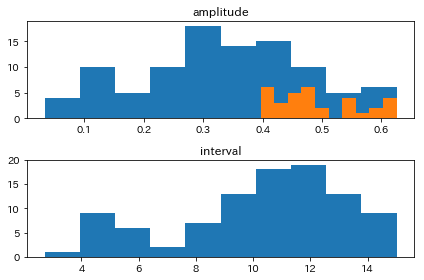

In [18]:
sorted_wave_heights = sorted(wave_heights)
H_third_list = sorted_wave_heights[2*round(len(sorted_wave_heights)/3):]

fig, (ax1, ax2) = plt.subplots(nrows=2)
ax1.hist(sorted_wave_heights)
ax1.hist(H_third_list)
ax1.set_title("amplitude")
print(sum(H_third_list)/len(H_third_list))
# print(sum(sorted_wave_heights))

ax2.hist(wave_interval)
ax2.set_title("interval")
print(sum(wave_interval)/len(wave_interval))

fig.tight_layout()

In [22]:
h13 = []
interval = []

for j in range(100):

    ww = ss.JONSWAP(100,10,0.5)
    dt = 0.01
    t=0
    wave_heights = []
    wave_interval = []
    tmp_max=0
    tmp_min=0
    tmp_ts=0
    upcross_num =0
    last_waveheight = 0
    current_waveheight = 0
    for i in range(100000):
        # zero upcross
        current_waveheight = ww.get(0,t)
        if(i==0): last_waveheight = current_waveheight
        if(last_waveheight<=0 and current_waveheight>0):
            # save last wave info (exclude first upcross)
            # reset tmp variables
            if(upcross_num==0):
                tmp_ts = t
            else: 
                wave_heights.append(tmp_max-tmp_min)
                wave_interval.append(t-tmp_ts)
                tmp_max = 0
                tmp_min = 0
                tmp_ts = t
            upcross_num += 1
        if(current_waveheight > tmp_max): tmp_max = current_waveheight
        if(current_waveheight < tmp_min): tmp_min = current_waveheight
        last_waveheight = current_waveheight
        t+=dt
    sorted_wave_heights = sorted(wave_heights)
    H_third_list = sorted_wave_heights[2*round(len(sorted_wave_heights)/3):]
    # print(sum(H_third_list)/len(H_third_list))
    # print(sum(wave_interval)/len(wave_interval))
    # print(j+1)
    h13.append(sum(H_third_list)/len(H_third_list))
    interval.append(sum(wave_interval)/len(wave_interval))
print(sum(h13)/len(h13))
print(sum(interval)/len(interval))

0.48381756834423206
9.242358490558892
1


KeyboardInterrupt: 

In [20]:
0.47807536334585243/0.5

0.9561507266917049

In [21]:
9.491126550650328/10

0.9491126550650328